In [1]:
pip install pandas numpy matplotlib seaborn

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached numpy-2.1.3-cp313-cp313-win_amd64.whl (12.6 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 3.7 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/7.8 MB 7.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 10.4 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 10.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----

In [2]:
pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn plotly

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Optional for interactive plots

# Statistical and machine learning
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Date and warnings
import datetime as dt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output


In [4]:
#Step 2: Load the ZHVI Data
#Assuming the dataset is in CSV format (e.g., zhvi.csv), here's how to load and inspect it:

In [5]:

# Load the dataset
file_path = r"C:\Users\abudi\OneDrive\Desktop\vscode101\ZHVI_MetroUS.csv"  # Update with the actual file path
zhvi = pd.read_csv(file_path)

# Display the first few rows
print(zhvi.head())

# Get summary information
print(zhvi.info())
print(zhvi.describe())


   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31  \
0    102001         0    United States    country       NaN  121618.117906   
1    394913         1     New York, NY        msa        NY  216209.133034   
2    753899         2  Los Angeles, CA        msa        CA  220054.246992   
3    394463         3      Chicago, IL        msa        IL  152313.404618   
4    394514         4       Dallas, TX        msa        TX  124931.823275   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  121832.083163  122097.431586  122666.551870  123321.541083  ...   
1  217127.899860  218055.176122  219934.196642  221879.987460  ...   
2  220873.127993  221963.869677  224134.079222  226507.608099  ...   
3  152454.402460  152722.935334  153390.978391  154194.553834  ...   
4  124987.468346  125051.438051  125217.560655  125436.588761  ...   

      2024-01-31     2024-02-29     2024-03-31     2024-04-30     2024-05-31  \
0  351518.721971  352307.61105

In [6]:
#Step 3: Understand the Data Structure
#Check the columns to understand what data you have:

#Identify key columns (e.g., region, time series, ZHVI values for different housing types).
#Look for missing values:

In [7]:
print(zhvi.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
StateName     1
             ..
2024-06-30    0
2024-07-31    0
2024-08-31    0
2024-09-30    0
2024-10-31    0
Length: 303, dtype: int64


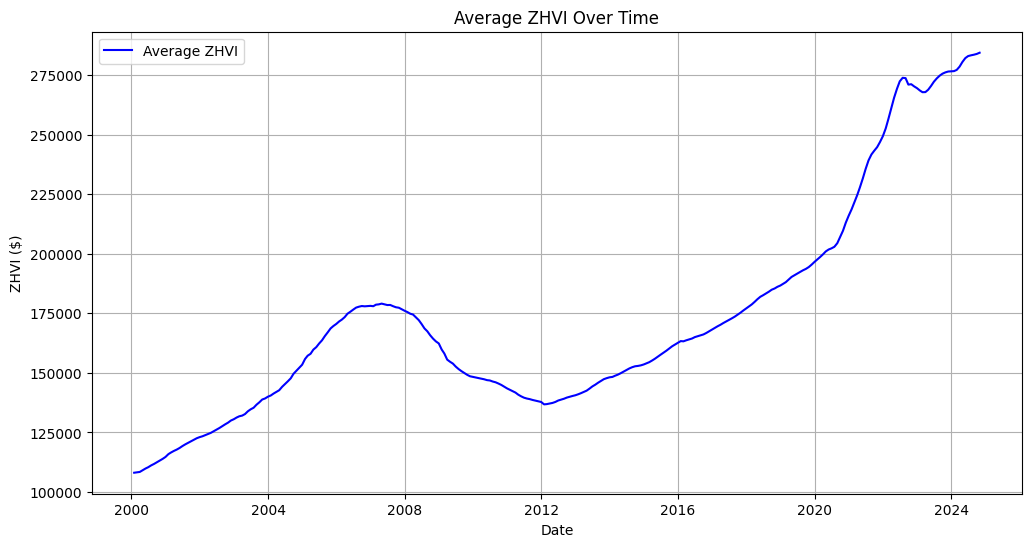

In [8]:


# Melt the data to reshape it
zhvi_melted = zhvi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'],
    var_name='Date',
    value_name='ZHVI'
)

# Convert 'Date' to datetime format
zhvi_melted['Date'] = pd.to_datetime(zhvi_melted['Date'])

# Calculate mean ZHVI across all regions for each date
mean_zhvi = zhvi_melted.groupby('Date')['ZHVI'].mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(mean_zhvi, label='Average ZHVI', color='blue')
plt.title('Average ZHVI Over Time')
plt.xlabel('Date')
plt.ylabel('ZHVI ($)')
plt.legend()
plt.grid()
plt.show()


In [35]:
#1. Trend Analysis
#Identify the overall trend in the ZHVI values (e.g., increasing, decreasing, or fluctuating).
#Detect periods of rapid growth or decline in housing prices.

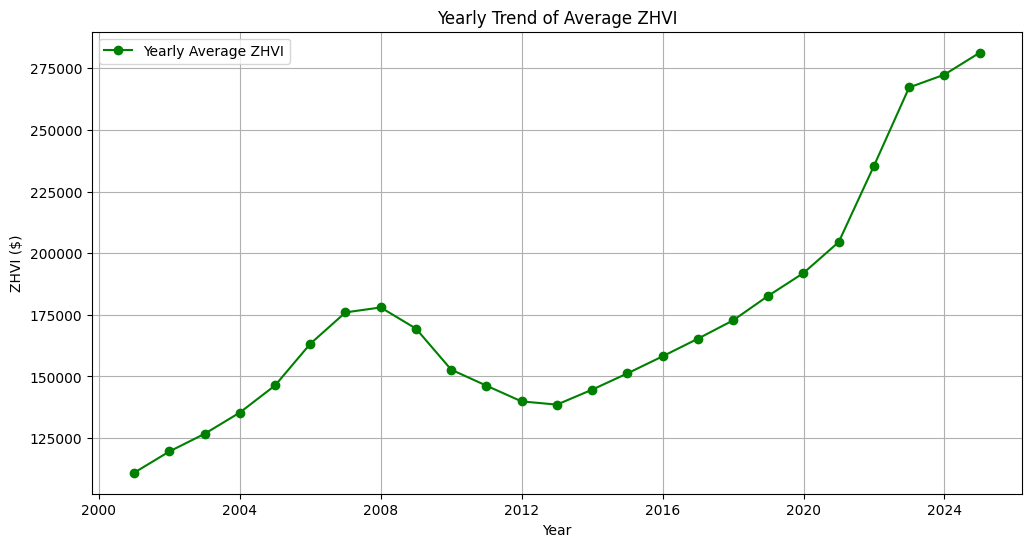

In [9]:
# Compute yearly averages to observe long-term trends
yearly_mean = mean_zhvi.resample('Y').mean()

# Plot yearly trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_mean, label='Yearly Average ZHVI', color='green', marker='o')
plt.title('Yearly Trend of Average ZHVI')
plt.xlabel('Year')
plt.ylabel('ZHVI ($)')
plt.legend()
plt.grid()
plt.show()

In [10]:
#2. Seasonal Patterns:

#Look for recurring patterns or seasonality in the data, such as increases during certain months or years.

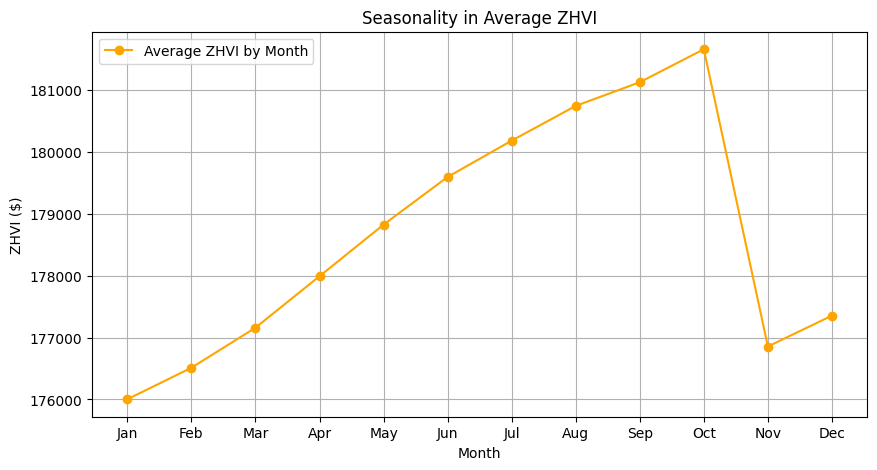

In [11]:
# Group by month to analyze seasonality
zhvi_melted['Month'] = zhvi_melted['Date'].dt.month
monthly_mean = zhvi_melted.groupby('Month')['ZHVI'].mean()

# Plot seasonality
plt.figure(figsize=(10, 5))
plt.plot(monthly_mean, label='Average ZHVI by Month', color='orange', marker='o')
plt.title('Seasonality in Average ZHVI')
plt.xlabel('Month')
plt.ylabel('ZHVI ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid()
plt.show()


In [12]:
#3. Growth Rate:

#Calculate the annual or monthly growth rate of the average ZHVI to measure the pace of price changes.

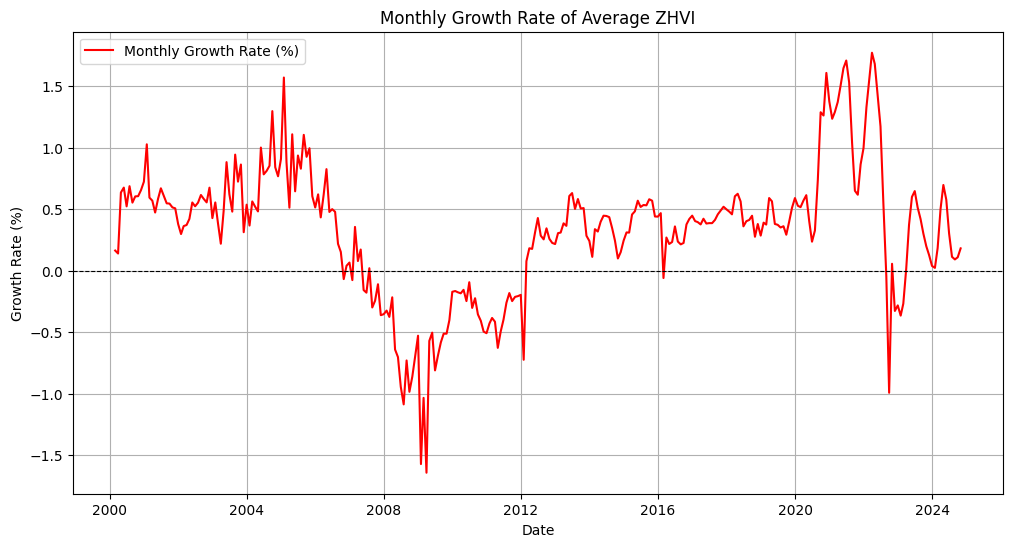

In [13]:
# Calculate monthly growth rate
mean_zhvi_pct_change = mean_zhvi.pct_change() * 100

# Plot growth rate
plt.figure(figsize=(12, 6))
plt.plot(mean_zhvi_pct_change, label='Monthly Growth Rate (%)', color='red')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Monthly Growth Rate of Average ZHVI')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid()
plt.show()


In [14]:
#4. Peak and Trough Analysis:

#Identify the highest and lowest average ZHVI values over the time period.

In [15]:
# Find peak and trough
peak_value = mean_zhvi.max()
trough_value = mean_zhvi.min()
peak_date = mean_zhvi.idxmax()
trough_date = mean_zhvi.idxmin()

print(f"Peak Average ZHVI: ${peak_value:.2f} on {peak_date}")
print(f"Trough Average ZHVI: ${trough_value:.2f} on {trough_date}")

Peak Average ZHVI: $284373.37 on 2024-10-31 00:00:00
Trough Average ZHVI: $108086.69 on 2000-01-31 00:00:00


In [17]:
#5. Moving Averages:

#Compute moving averages to smooth the data and better understand long-term trends.

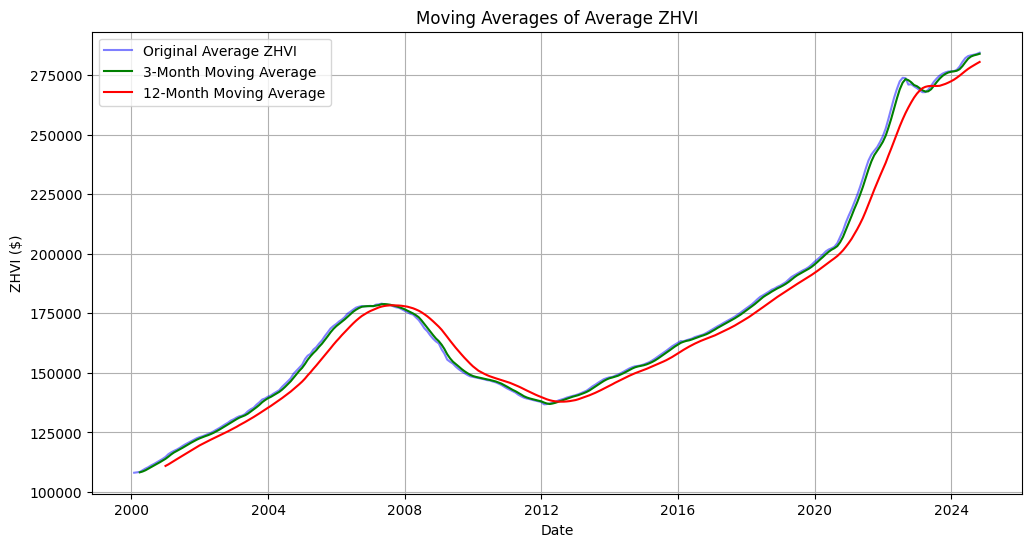

In [18]:
# Compute moving averages
mean_zhvi_3mo = mean_zhvi.rolling(window=3).mean()  # 3-month moving average
mean_zhvi_12mo = mean_zhvi.rolling(window=12).mean()  # 12-month moving average

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(mean_zhvi, label='Original Average ZHVI', color='blue', alpha=0.5)
plt.plot(mean_zhvi_3mo, label='3-Month Moving Average', color='green')
plt.plot(mean_zhvi_12mo, label='12-Month Moving Average', color='red')
plt.title('Moving Averages of Average ZHVI')
plt.xlabel('Date')
plt.ylabel('ZHVI ($)')
plt.legend()
plt.grid()
plt.show()

In [19]:
#Approach
#1. Filter Data for Minnesota Metro Areas:

#Extract data for regions in Minnesota (e.g., Minneapolis-St. Paul metro).

In [20]:
# Filter Minnesota Metro Areas
minnesota_data = zhvi_melted[zhvi_melted['RegionName'].str.contains('MN')]

# Define Midwest Sub-Regions (East, West, etc.)
midwest_regions = {
    "East Midwest": ['IL', 'IN', 'OH', 'MI'],
    "West Midwest": ['MN', 'IA', 'ND', 'SD', 'NE', 'KS', 'MO', 'WI']
}

# Filter Midwest data
zhvi_melted['RegionCategory'] = zhvi_melted['StateName'].apply(
    lambda x: 'East Midwest' if x in midwest_regions['East Midwest'] else 
              'West Midwest' if x in midwest_regions['West Midwest'] else 'Other'
)
midwest_data = zhvi_melted[zhvi_melted['RegionCategory'] != 'Other']


In [21]:
#2. Group Midwest Sub-Regions:

#Define Midwest sub-regions (e.g., East Midwest and West Midwest).
#Filter the dataset based on these classifications.

In [22]:
# Compute average ZHVI for each sub-region
avg_midwest = midwest_data.groupby(['Date', 'RegionCategory'])['ZHVI'].mean().reset_index()
avg_minnesota = minnesota_data.groupby('Date')['ZHVI'].mean()

# Merge data for comparison
comparison_data = avg_midwest.pivot(index='Date', columns='RegionCategory', values='ZHVI')
comparison_data['Minnesota'] = avg_minnesota


In [23]:
#3. Aggregate ZHVI by Region:

#Calculate the average ZHVI for each sub-region and compare it to Minnesota metro areas.

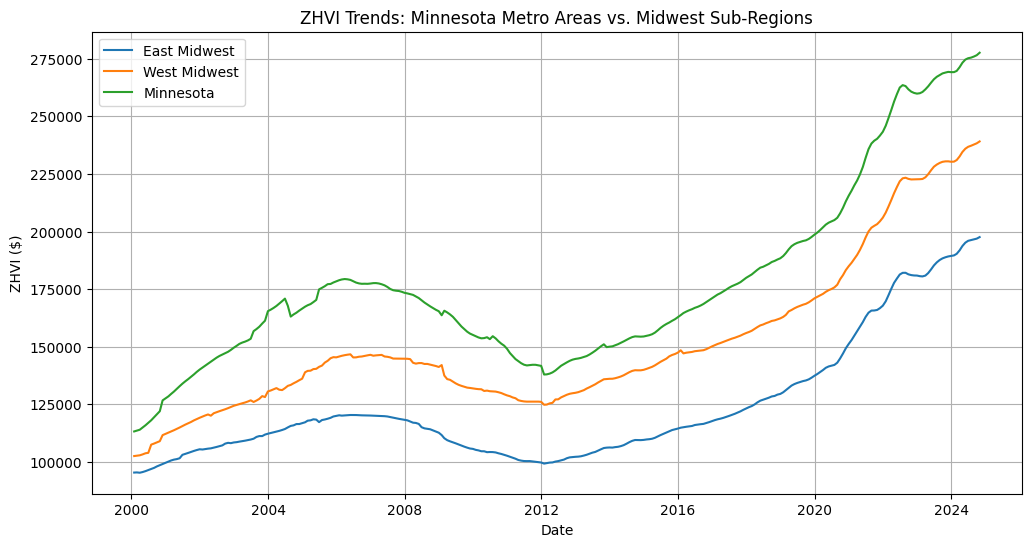

In [24]:
# Plot comparison
plt.figure(figsize=(12, 6))
for column in comparison_data.columns:
    plt.plot(comparison_data.index, comparison_data[column], label=column)

plt.title('ZHVI Trends: Minnesota Metro Areas vs. Midwest Sub-Regions')
plt.xlabel('Date')
plt.ylabel('ZHVI ($)')
plt.legend()
plt.grid()
plt.show()


In [25]:
#4. Trend Analysis:

#Plot ZHVI trends for Minnesota metro areas against Midwest sub-regions.

In [26]:
# Compute summary statistics
summary_stats = comparison_data.describe()

print("Summary Statistics:")
print(summary_stats)

# Calculate growth rates
growth_rates = comparison_data.pct_change().mean() * 100
print("\nAverage Growth Rates (%):")
print(growth_rates)


Summary Statistics:
RegionCategory   East Midwest   West Midwest      Minnesota
count              298.000000     298.000000     298.000000
mean            123712.716818  151433.317359  176673.865171
std              26495.334302   33166.070028   39553.843419
min              95350.824773  102580.562035  113261.996918
25%             105963.180656  130279.458069  150519.056078
50%             115372.968472  142622.462169  167360.065126
75%             127801.514329  160558.267429  185799.530223
max             197584.206920  239090.833218  277577.693149

Average Growth Rates (%):
RegionCategory
East Midwest    0.246340
West Midwest    0.286686
Minnesota       0.304328
dtype: float64


## Interpretation of the Results

### 1.Summary Statistics
The summary statistics provide insights into the historical performance and variability of the ZHVI (Zillow Home Value Index) for East Midwest, West Midwest, and Minnesota.

#### Mean ZHVI (Average Home Value):

Minnesota **$176,673** has the highest mean ZHVI, indicating that housing values in Minnesota are, on average, **higher** than the East Midwest **$123,712** and West Midwest **$151,433**.
West Midwest follows, reflecting the relatively stronger housing markets in states like Wisconsin, Nebraska, and Missouri.
East Midwest has the lowest mean ZHVI, showing weaker housing values in states like Ohio and Indiana.

#### Standard Deviation (Variability):

Minnesota **$39,554** exhibits **higher variability** in ZHVI, reflecting greater disparity in housing values across regions within the state.
West Midwest **$33,166** and East Midwest **$26,495** have lower standard deviations, indicating relatively more consistent housing values in those regions.

#### Median ZHVI (50th Percentile):

The median ZHVI follows a similar pattern: Minnesota **$167,360** > West Midwest **$142,622** > East Midwest **$115,373**.
This shows that even mid-range housing prices in Minnesota are significantly higher compared to other Midwest sub-regions.

#### Minimum and Maximum ZHVI:

Minnesota’s maximum ZHVI **$277,578** is substantially **higher** than the West Midwest **$239,091** and East Midwest **$197,584**, showing that Minnesota's market includes higher-end housing values.
The minimum ZHVI for Minnesota **$113,262** is also **higher** than that of the West Midwest **$102,581** and East Midwest **$95,351**, suggesting that even **entry-level homes in Minnesota tend to be more expensive**.



### 2.Average Growth Rates
The growth rates provide insights into how housing values have evolved over time.

Minnesota: **0.30%** Growth per Month (Annualized **~3.66%**)
Minnesota leads in growth rates, suggesting a robust and steadily appreciating housing market.
This higher growth might indicate increasing demand or constrained housing supply in Minnesota metro areas.

West Midwest: **0.29%** Growth per Month (**Annualized ~3.44%**)
The West Midwest shows moderately strong growth, likely driven by urban hubs like Kansas City and Milwaukee, but slightly lags behind Minnesota.

East Midwest: **0.25%** Growth per Month (**Annualized ~3.02%**)
The East Midwest shows the lowest growth, reflecting relatively slower appreciation in housing values. This may be due to weaker economic conditions or lower demand in states like Ohio and Indiana.



### Key Takeaways
 Minnesota's Housing Market Outperforms:

Higher average ZHVI, greater variability (indicating diversity in housing), and faster growth rates suggest Minnesota is a stronger housing market compared to the Midwest sub-regions.
West Midwest is a Solid Contender:

The West Midwest demonstrates moderate growth and values, making it a balanced housing market with room for appreciation.
East Midwest Lags Behind:

Lower ZHVI and slower growth suggest that East Midwest housing markets are more affordable but may lack the same level of investment opportunities as Minnesota.

Minnesota's Strategic Position:
The consistent growth and higher values suggest Minnesota’s housing market is driven by strong demand and could offer investment opportunities for those looking to capitalize on sustained appreciation.
